In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Naive Bias Dataset.csv")
data.head()

,ID,Score,Sex,Age,Authority,Money,Product no,Balance (estimated),Exited
0,15634602,619,0,42,2,0.00,1,101348.88,1
1,15647311,608,0,41,1,83807.86,1,112542.58,0
2,15619304,502,0,42,8,159660.80,3,113931.57,1
3,15701354,699,0,39,1,0.00,2,93826.63,0
4,15737888,850,0,43,2,125510.82,1,79084.10,0


In [3]:
data.shape

(10000, 9)

In [4]:
data.isnull().sum()

ID                     0
Score                  0
Sex                    0
Age                    0
Authority              0
Money                  0
Product no             0
Balance (estimated)    0
Exited                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   Score                10000 non-null  int64  
 2   Sex                  10000 non-null  int64  
 3   Age                  10000 non-null  int64  
 4   Authority            10000 non-null  int64  
 5   Money                10000 non-null  float64
 6   Product no           10000 non-null  int64  
 7   Balance (estimated)  10000 non-null  float64
 8   Exited               10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.3 KB


In [6]:
data[data.duplicated()]

,ID,Score,Sex,Age,Authority,Money,Product no,Balance (estimated),Exited


In [7]:
data1 = data.drop("ID", axis = 1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Score                10000 non-null  int64  
 1   Sex                  10000 non-null  int64  
 2   Age                  10000 non-null  int64  
 3   Authority            10000 non-null  int64  
 4   Money                10000 non-null  float64
 5   Product no           10000 non-null  int64  
 6   Balance (estimated)  10000 non-null  float64
 7   Exited               10000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 625.1 KB


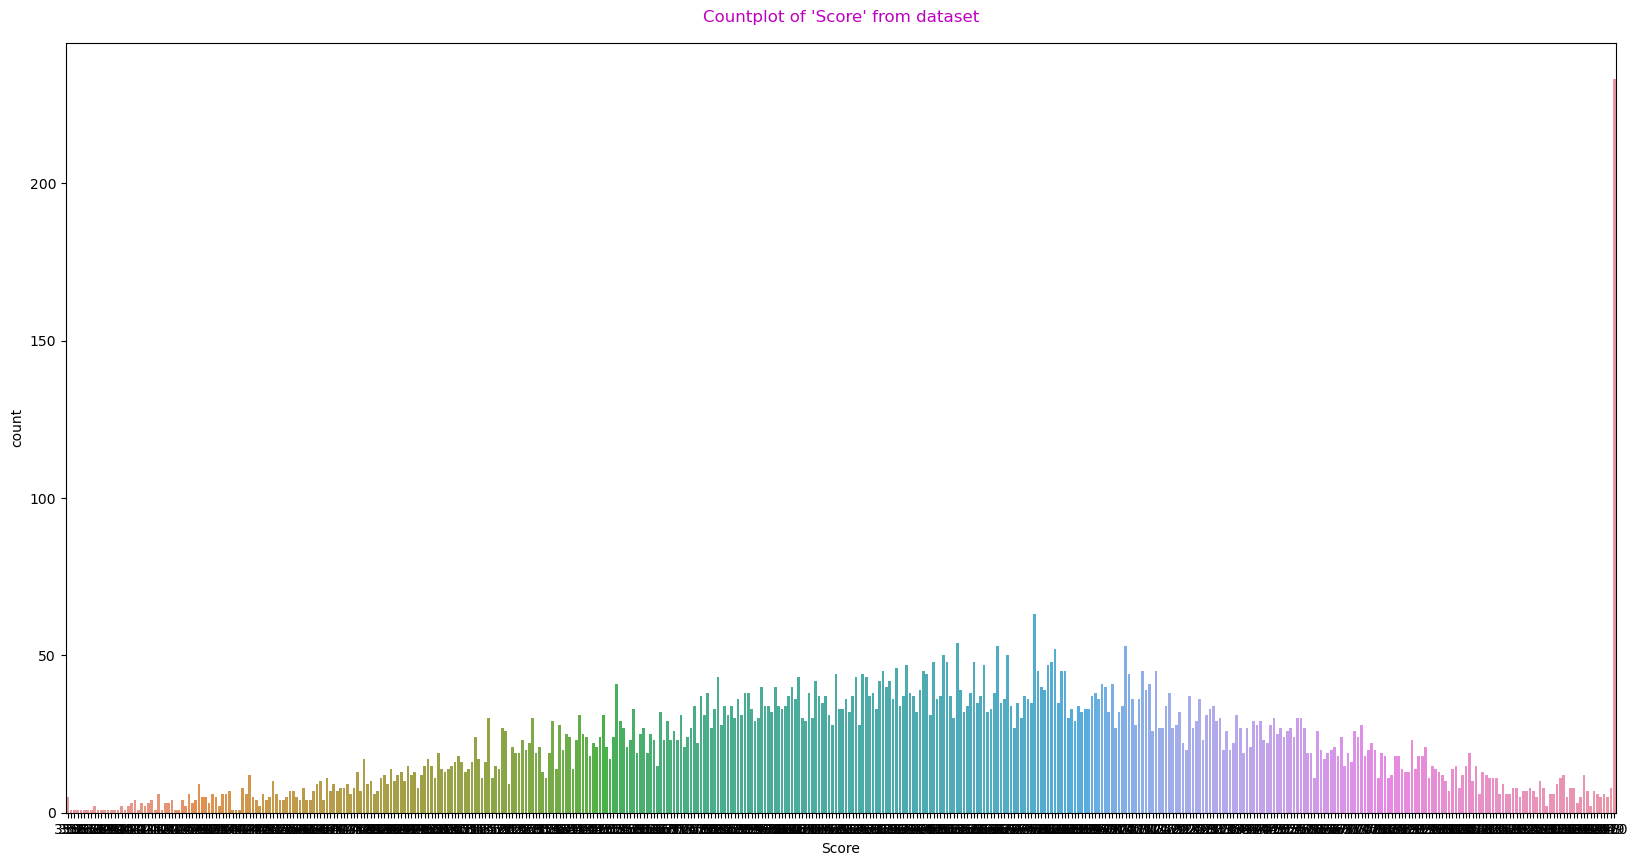

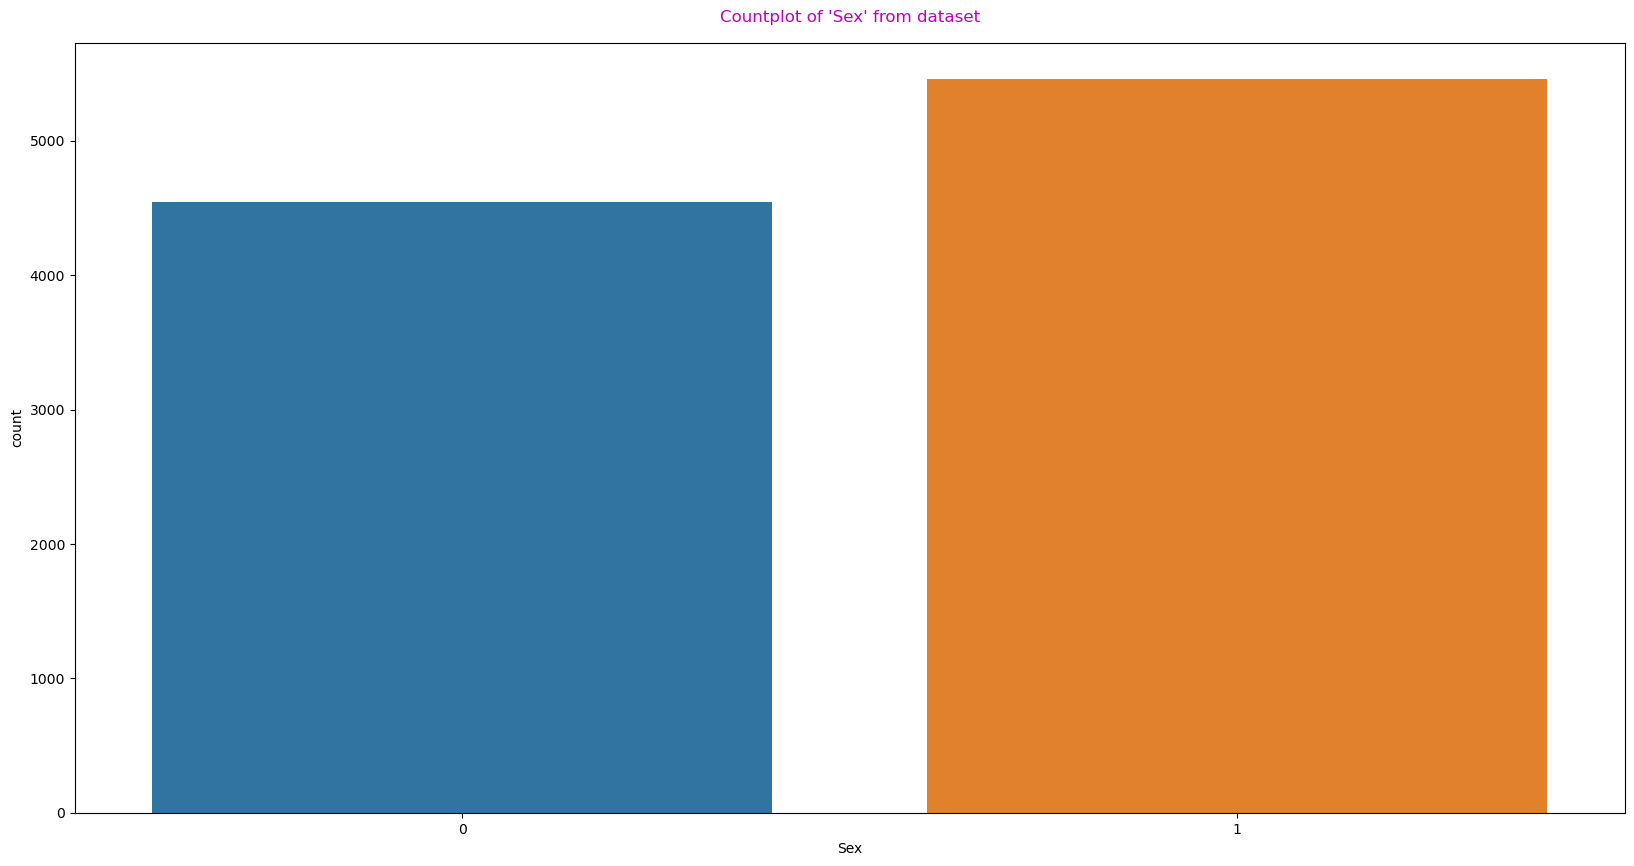

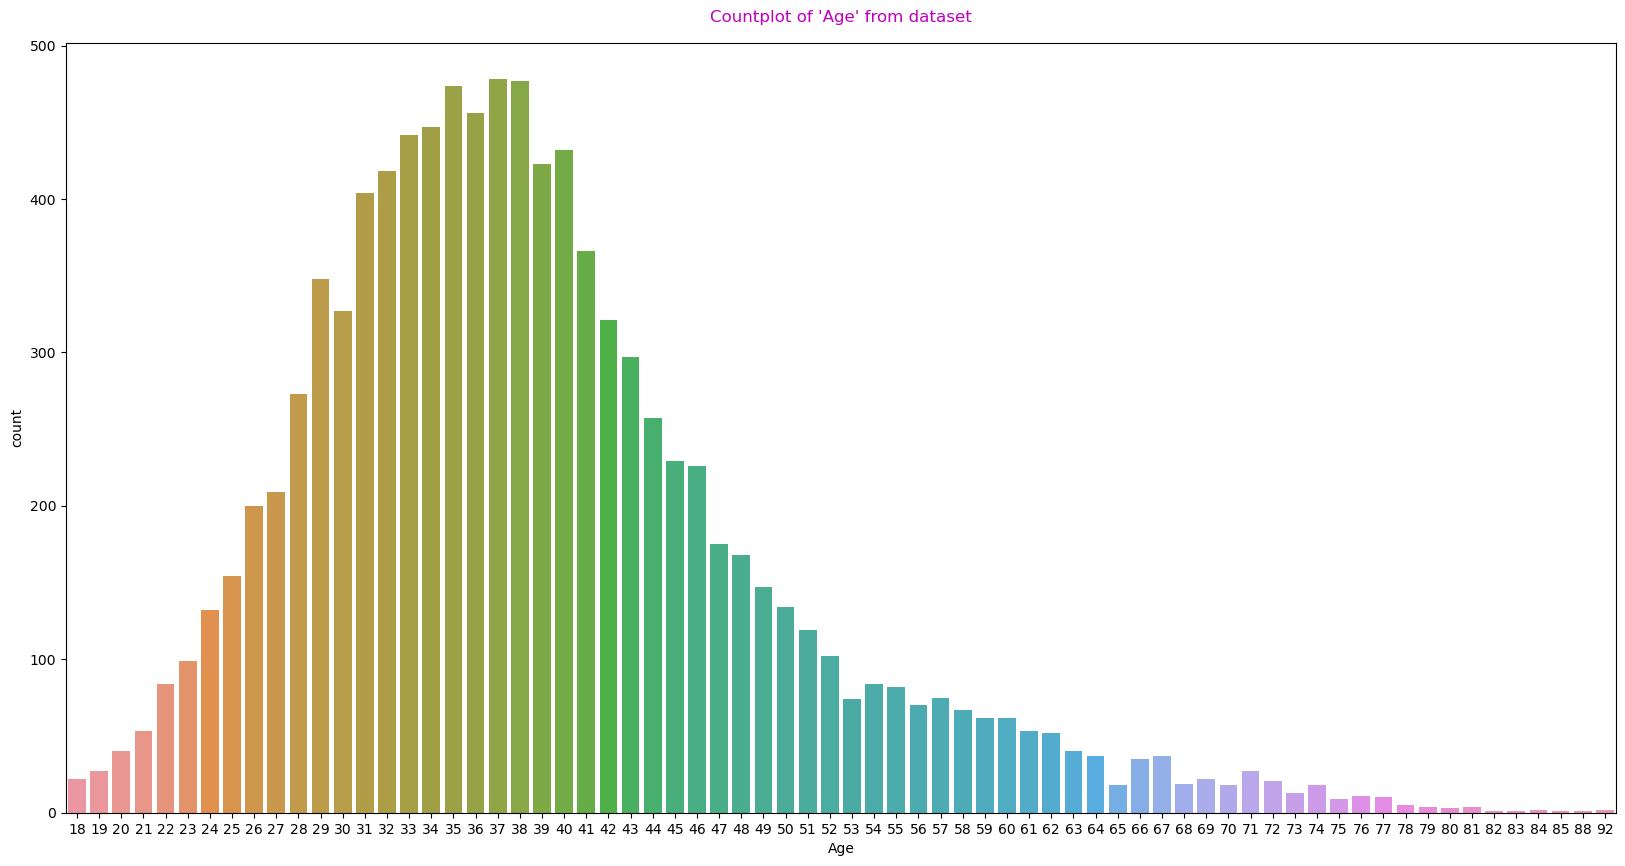

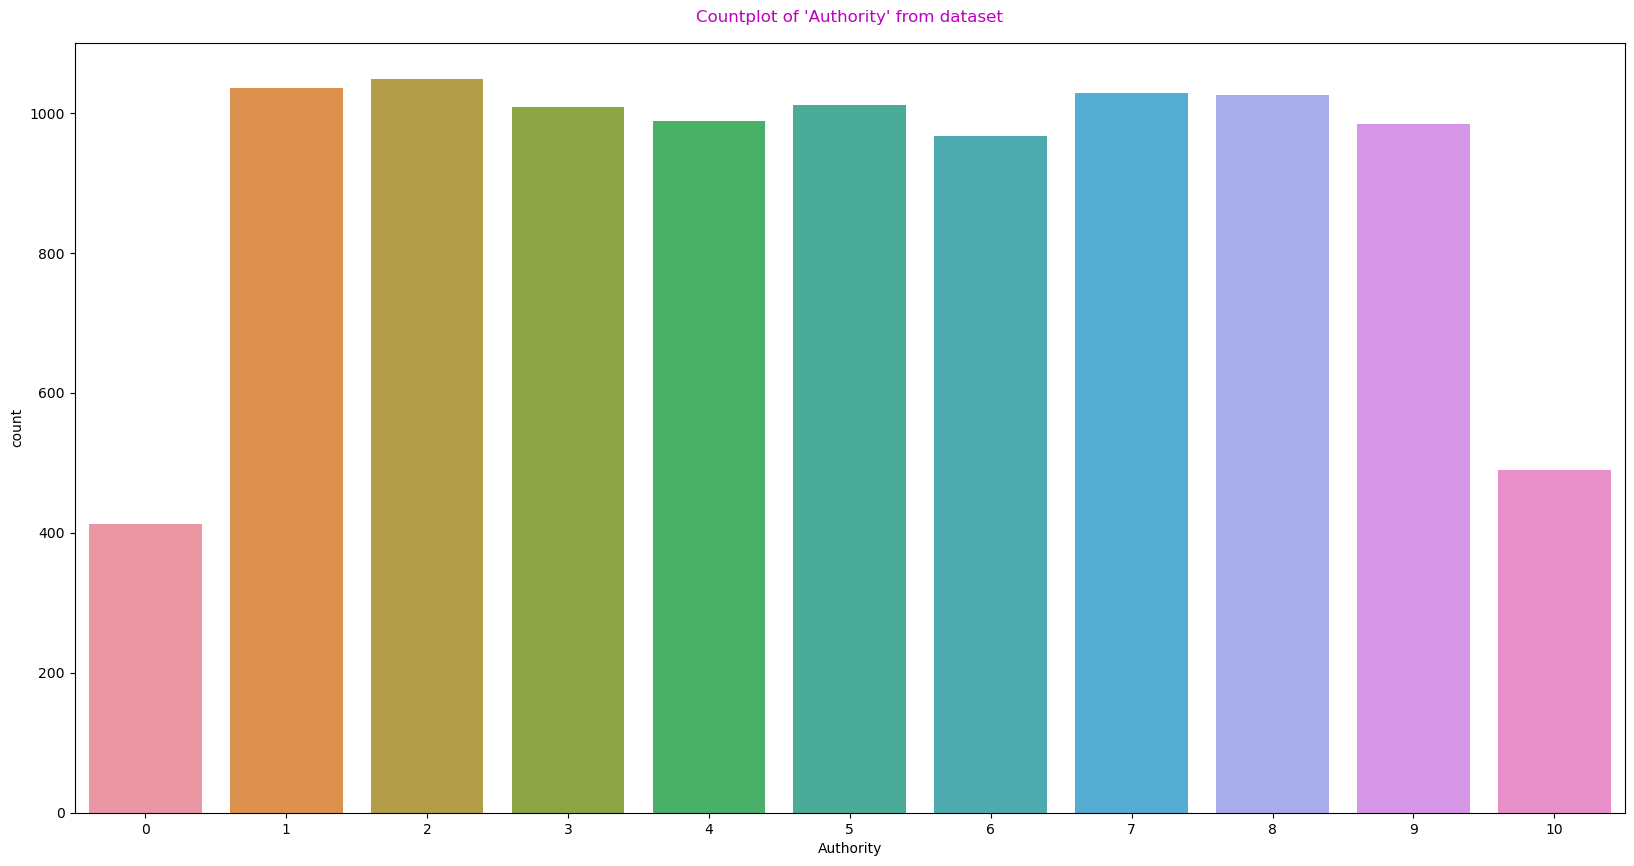

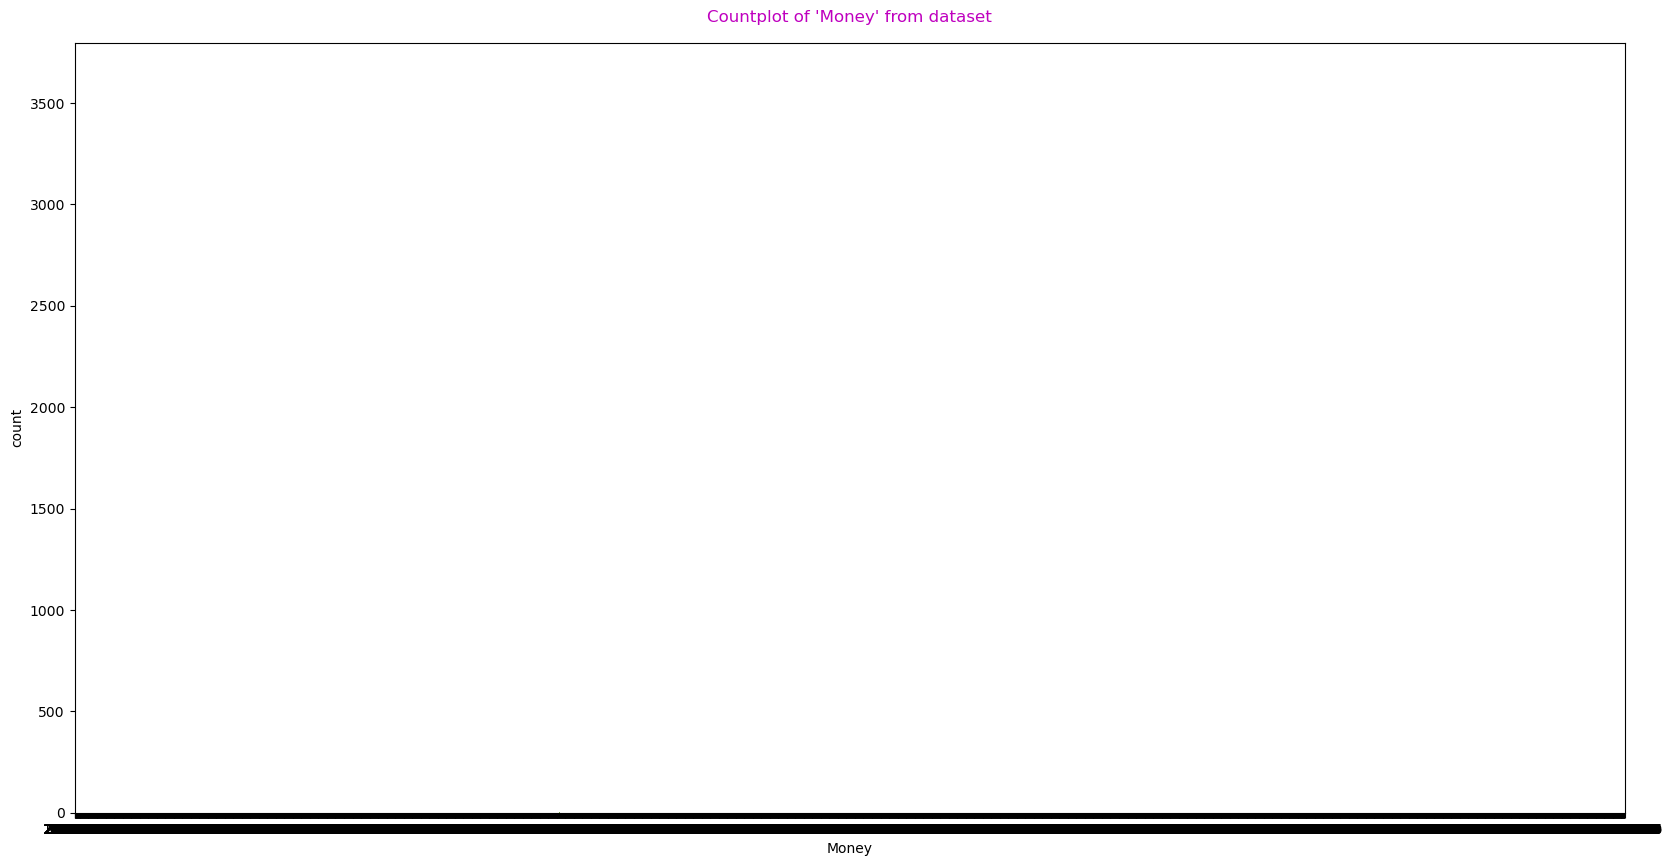

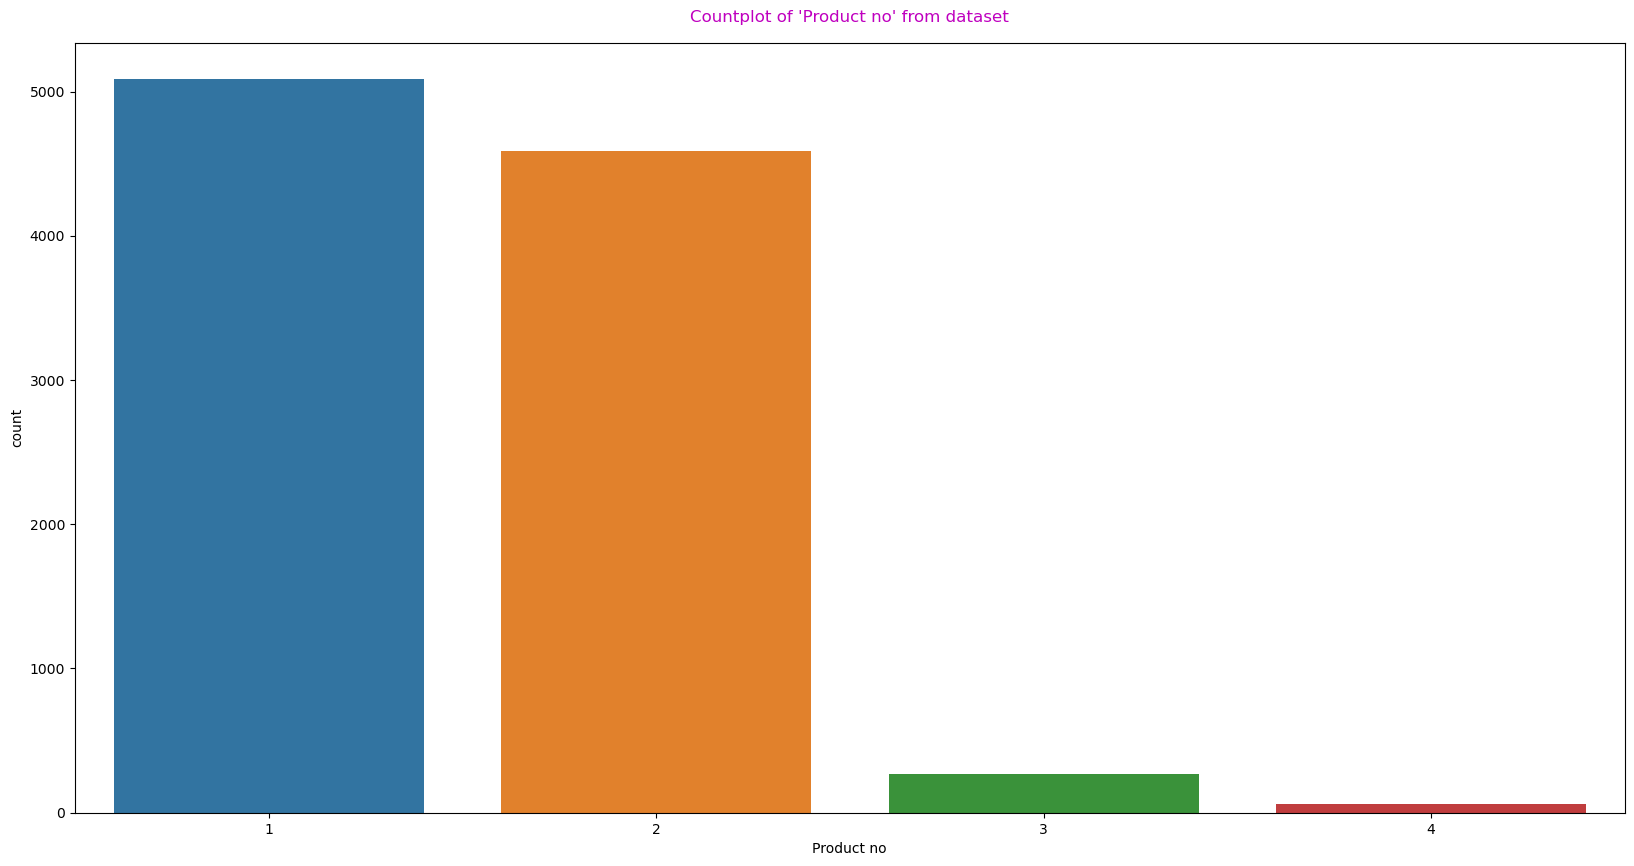

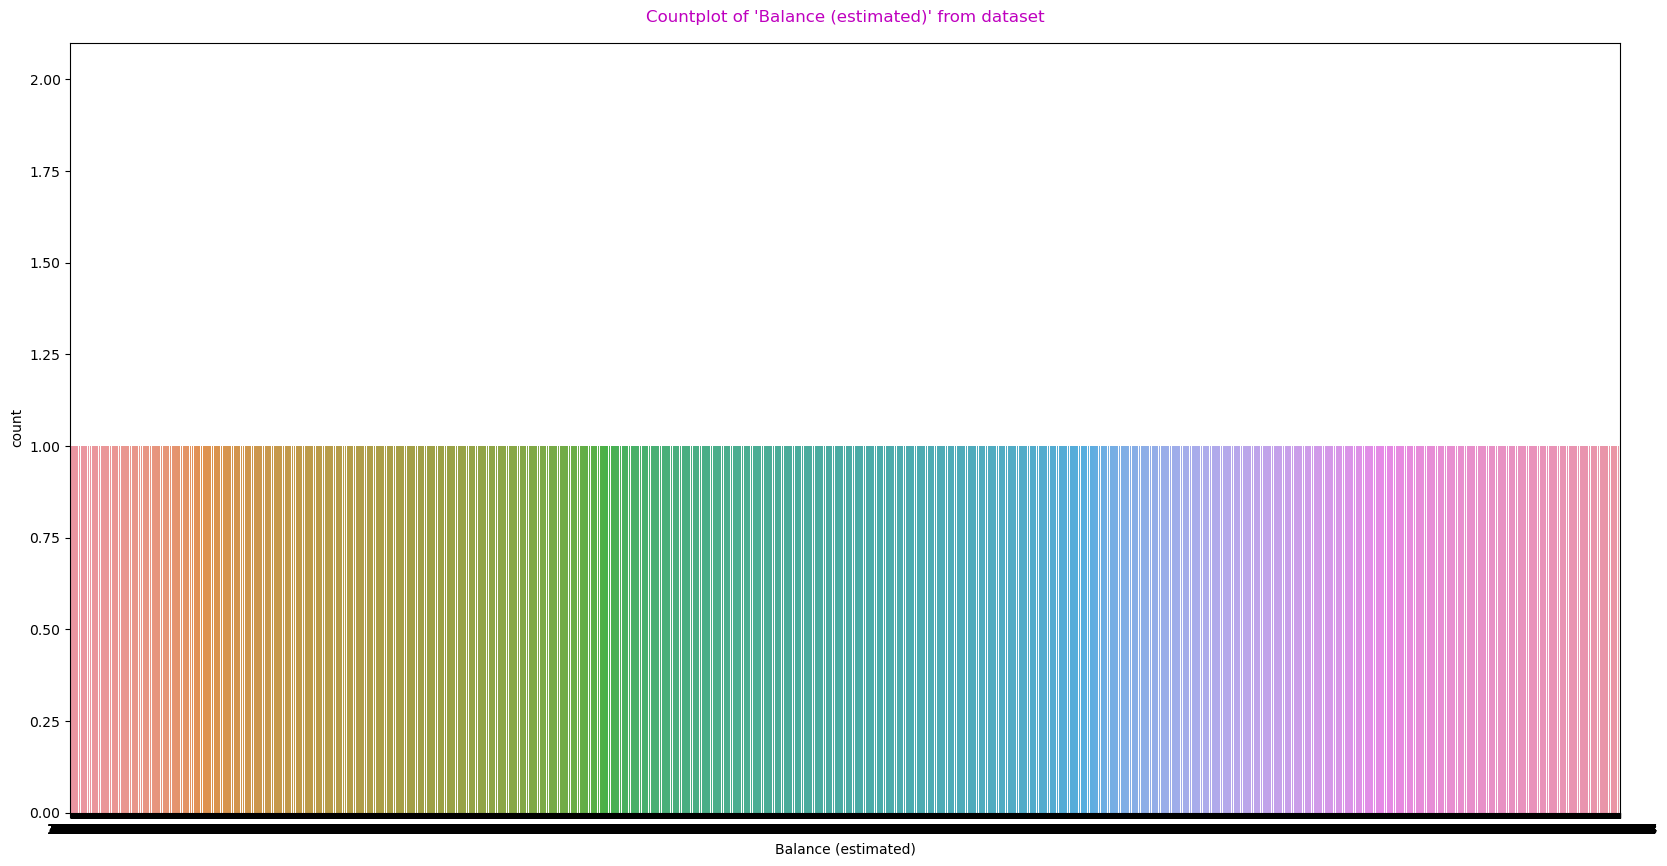

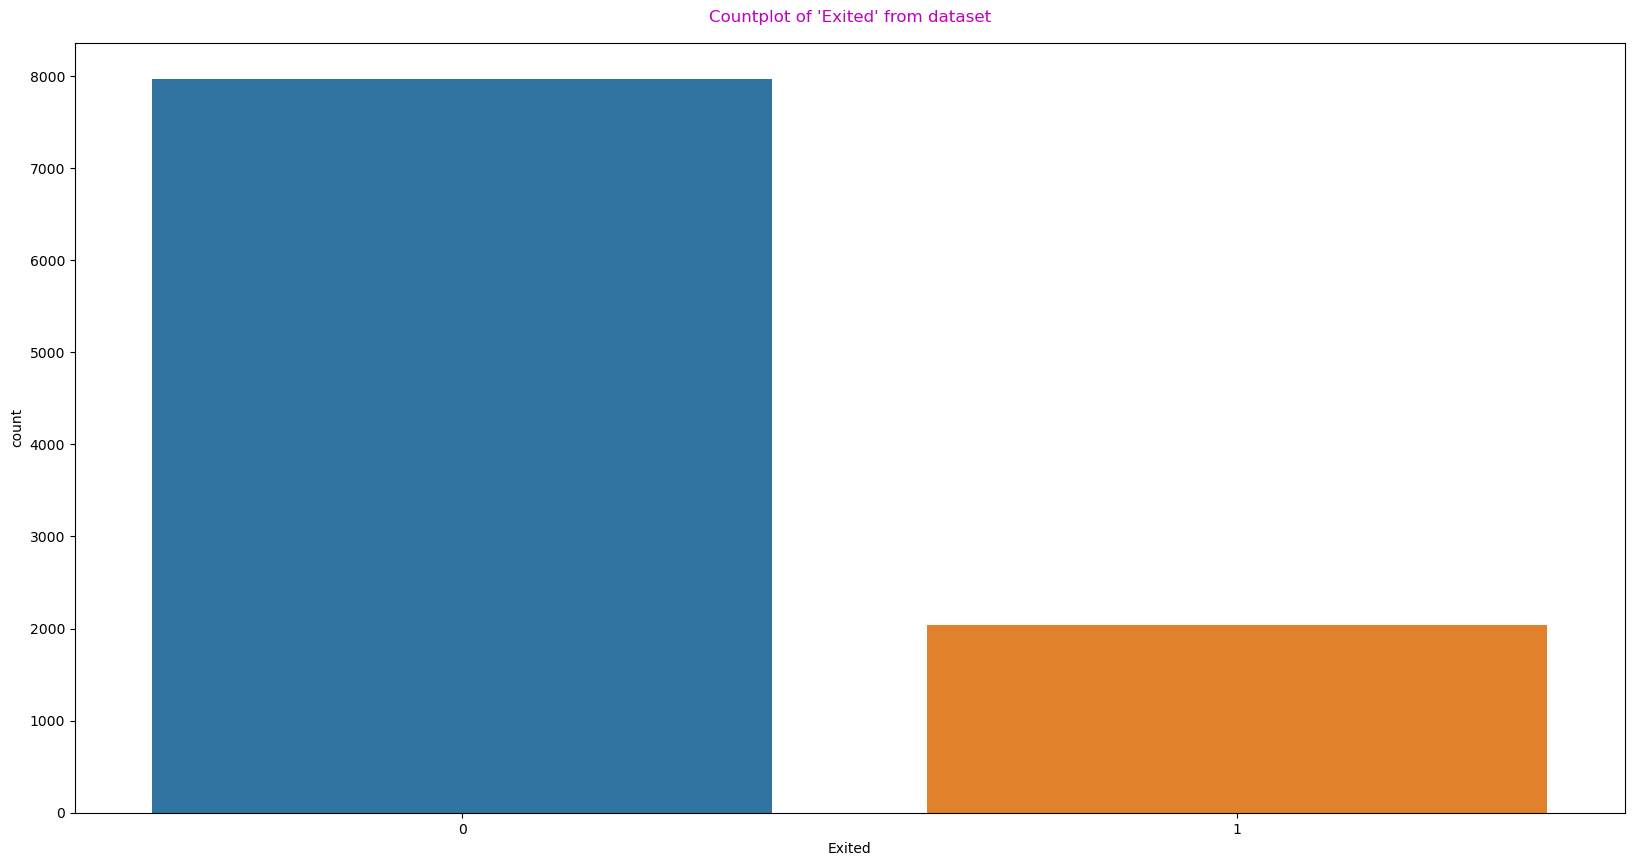

In [9]:

for feature in data1.columns:
    plt.figure(figsize = (20,10)) # plt.figure(figsize = (Width,Height))
    sns.countplot(data = data1, x = feature)
    plt.title(f"Countplot of '{feature}' from dataset", pad = 15, c = 'm')
    plt.show()

<Axes: xlabel='Exited', ylabel='count'>

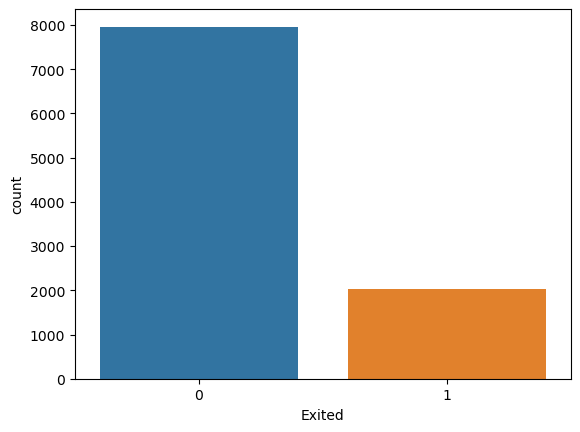

In [10]:
sns.countplot(x = data1.Exited)


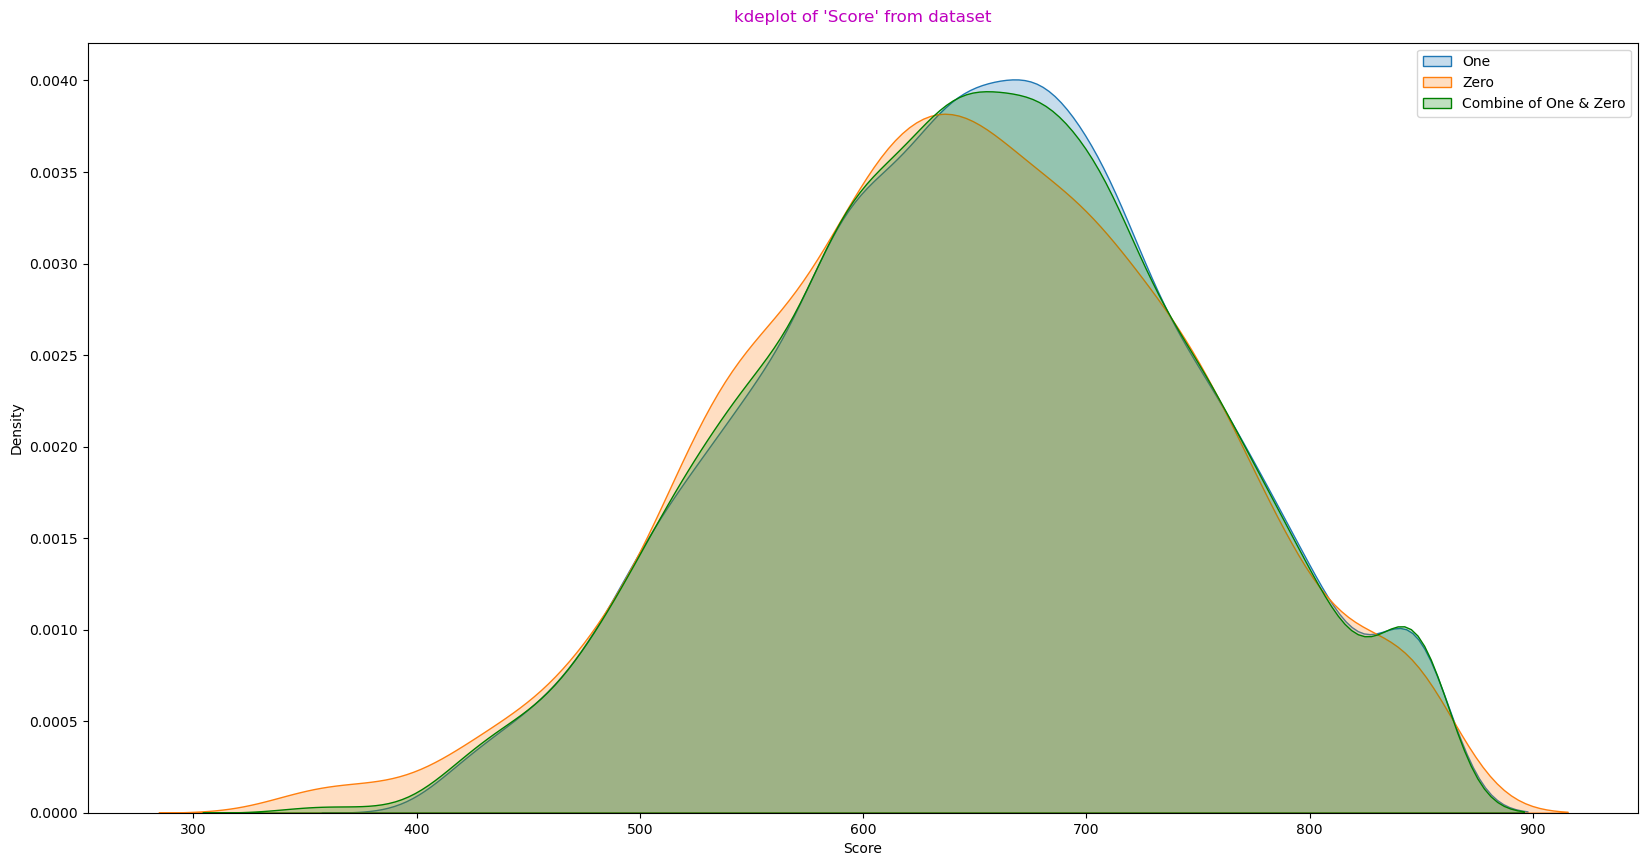

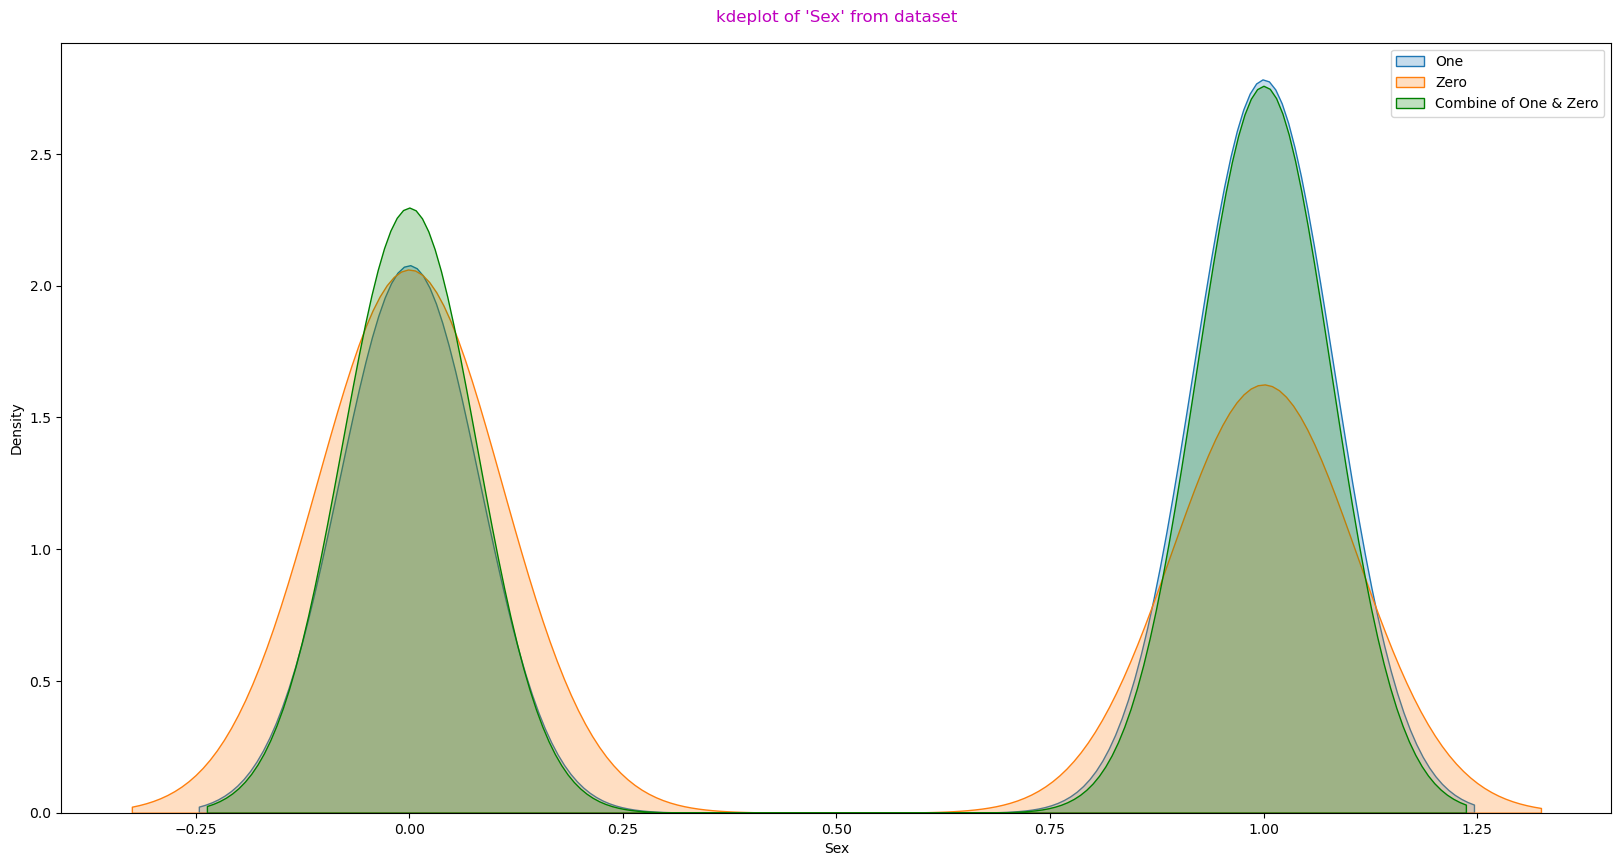

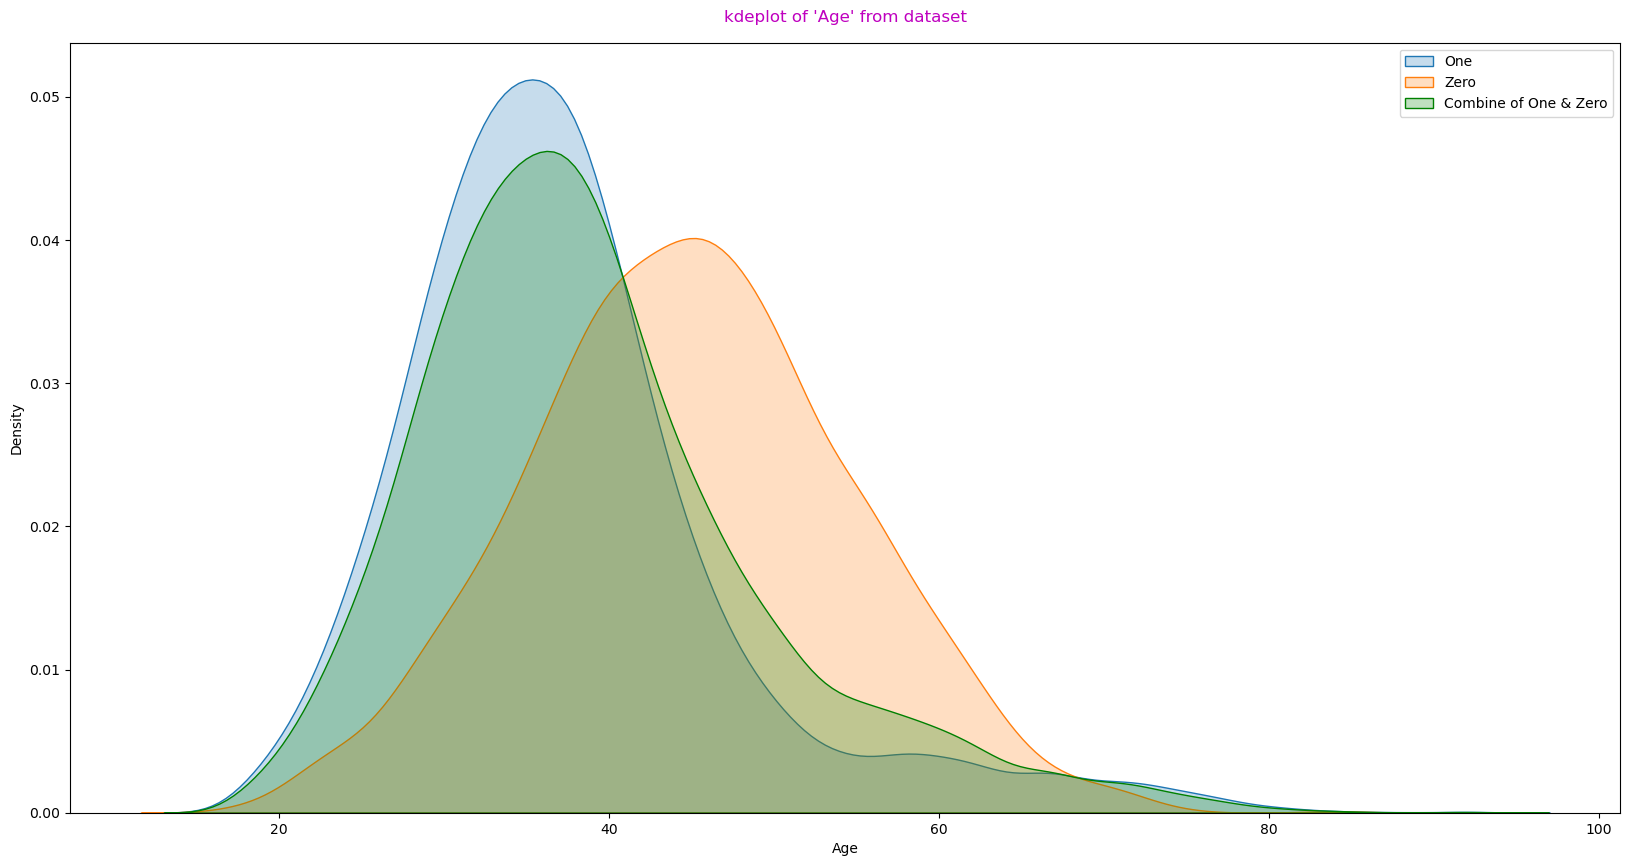

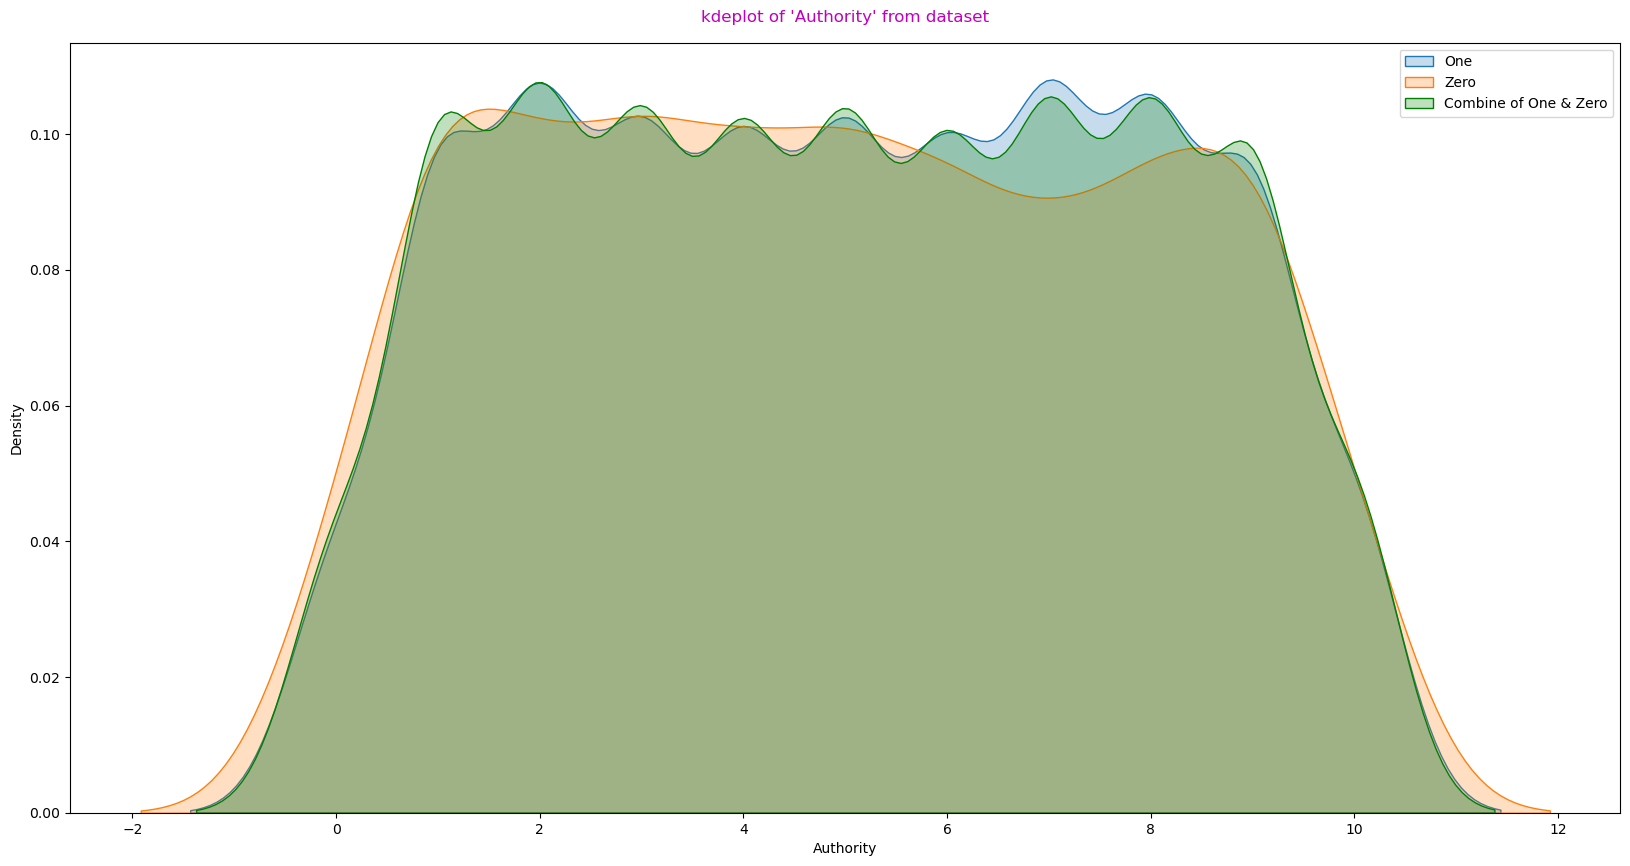

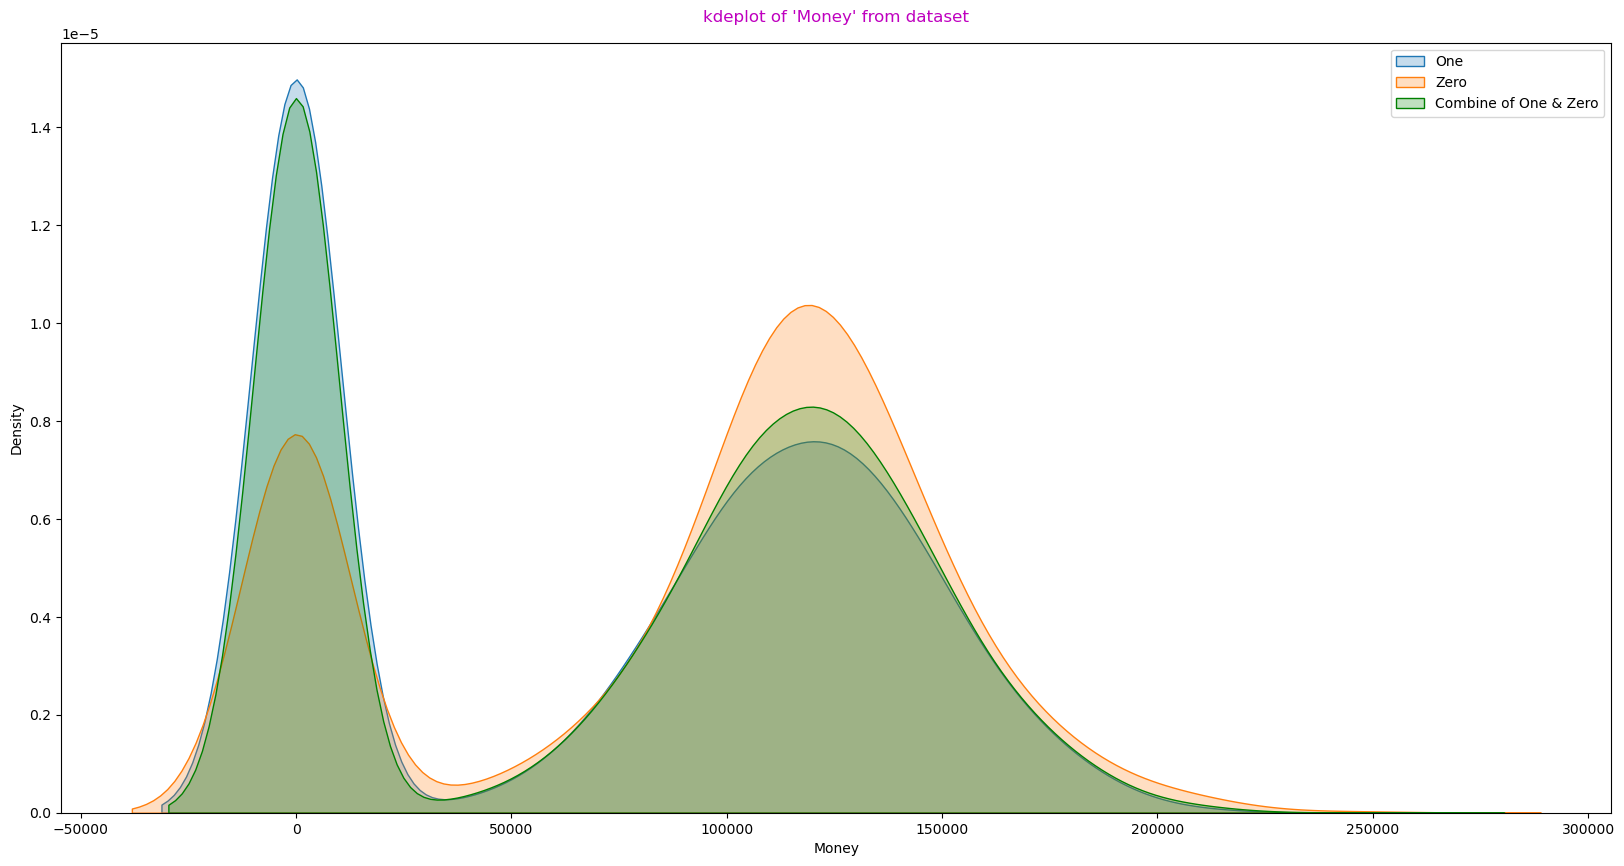

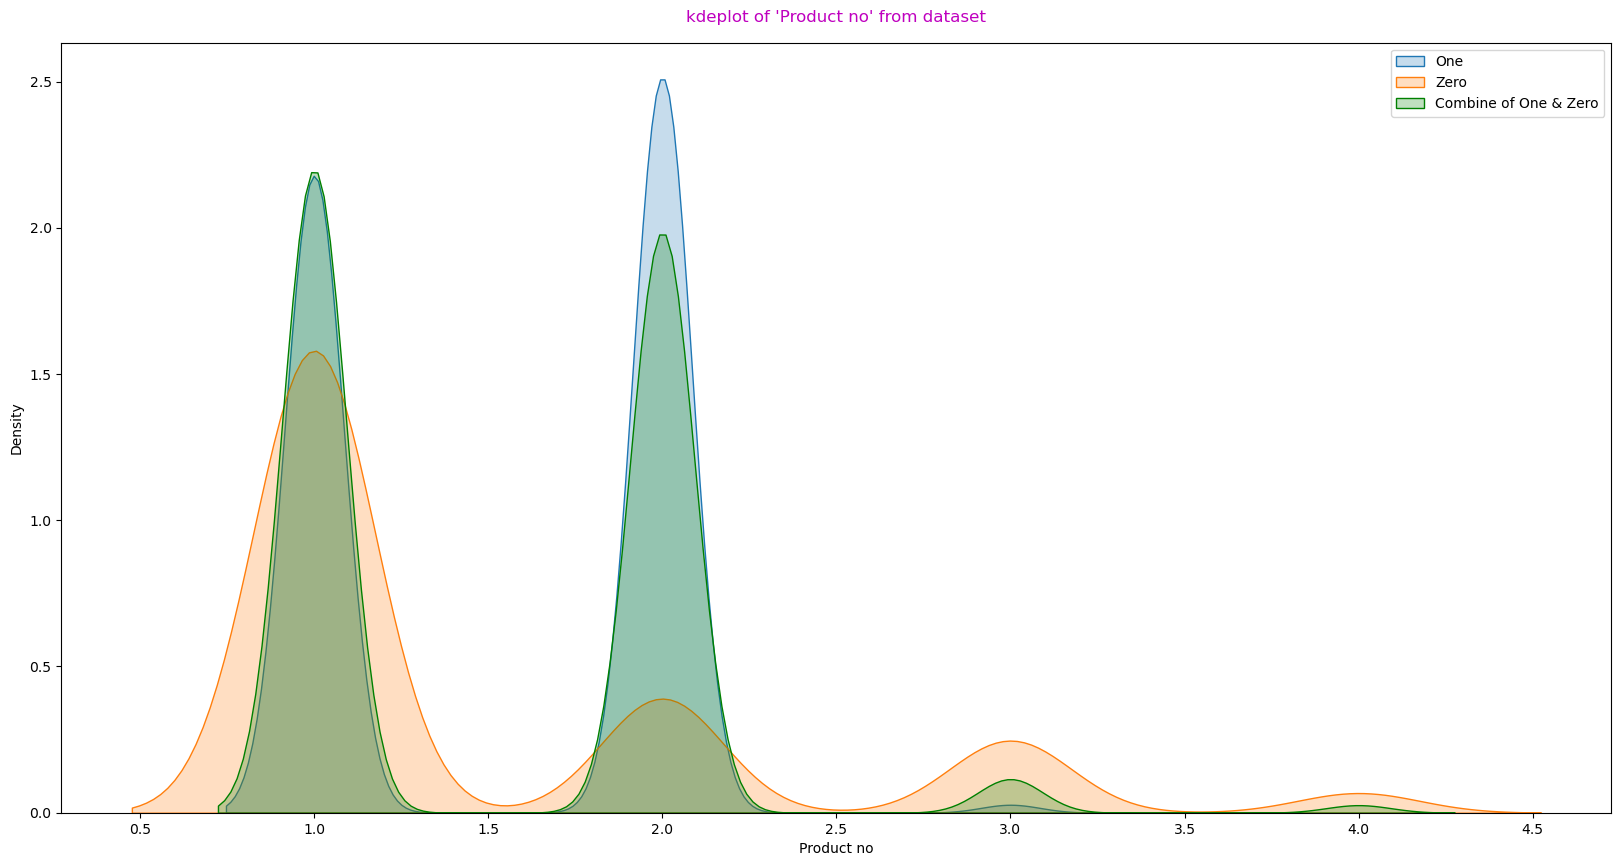

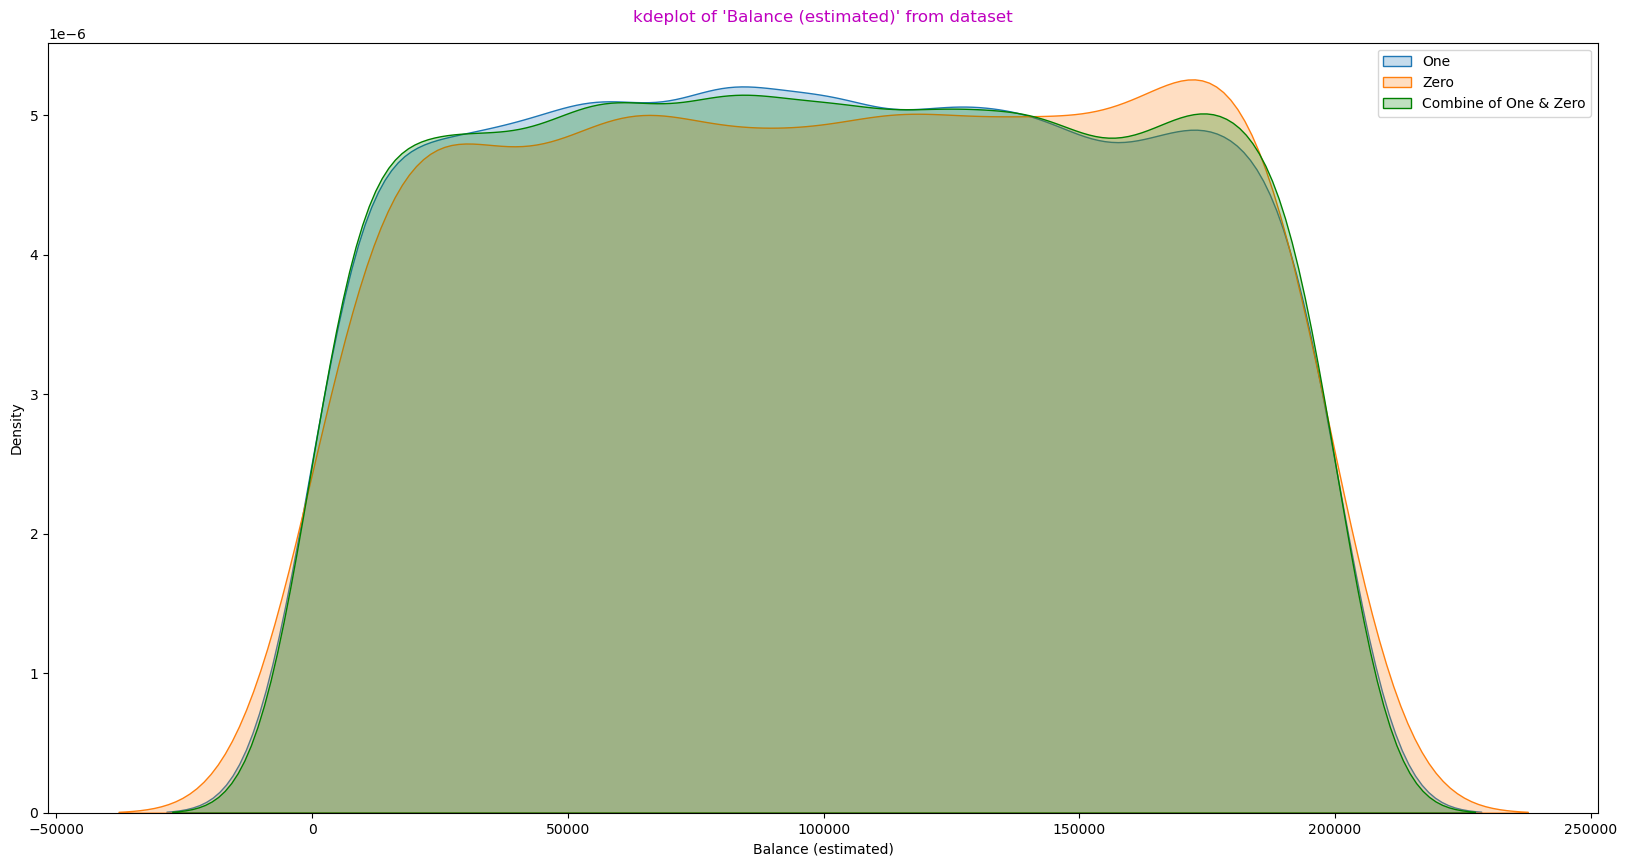

C:\Users\Admin\AppData\Local\Temp\ipykernel_2480\3364769848.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data1[data1.Exited == 0][feature], label = 'One', fill = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2480\3364769848.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data1[data1.Exited == 1][feature], label = 'Zero', fill = True)


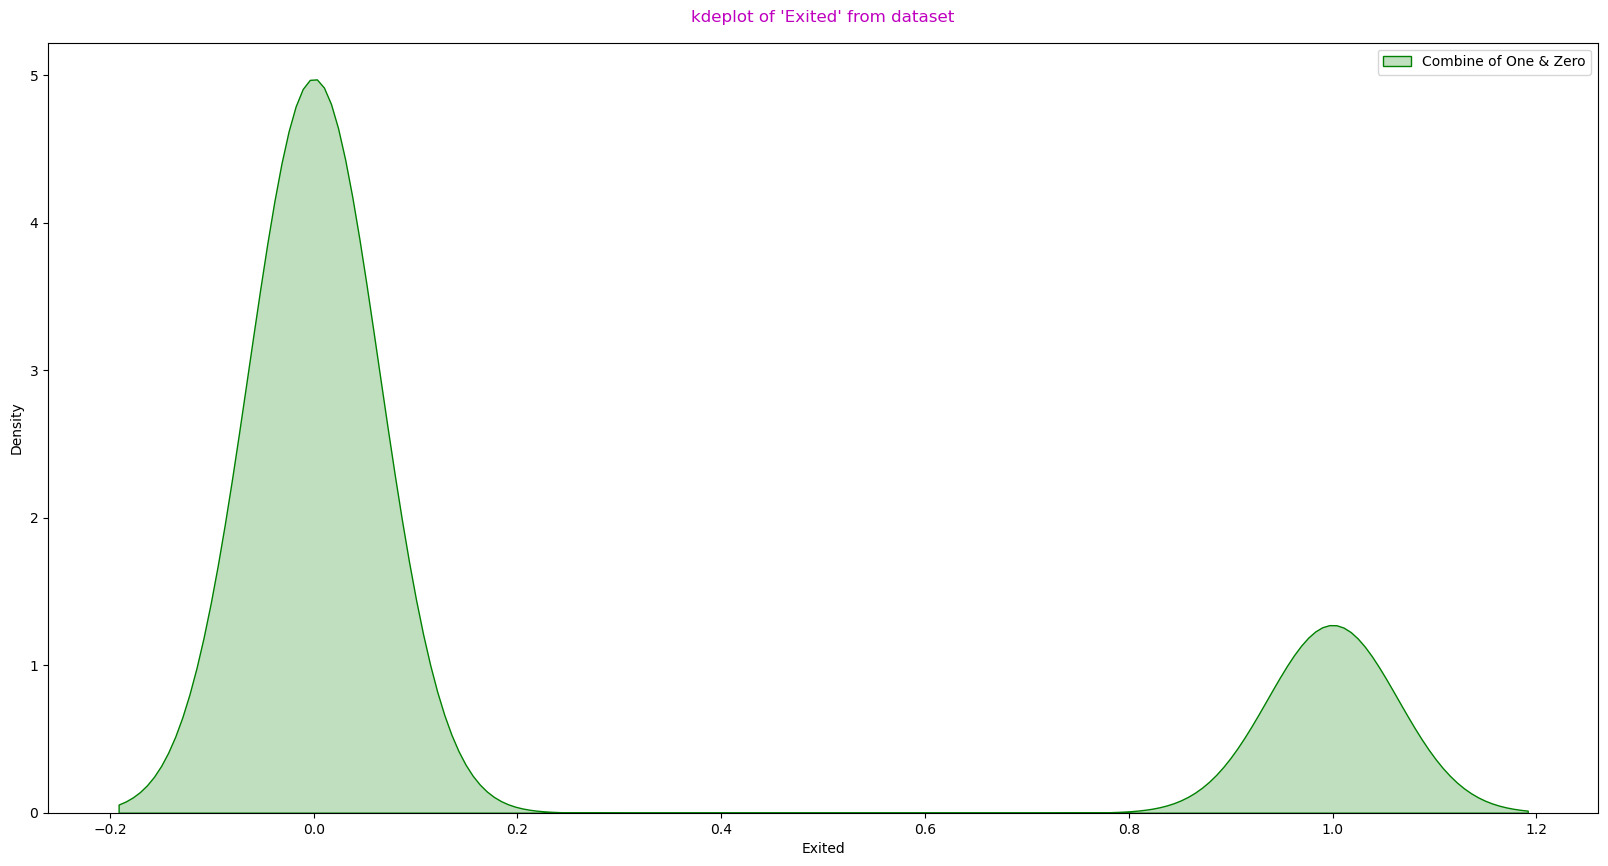

In [13]:

for feature in data1.columns:
    plt.figure(figsize = (20,10)) # plt.figure(figsize = (Width,Height))
    sns.kdeplot(data1[data1.Exited == 0][feature], label = 'One', fill = True)
    sns.kdeplot(data1[data1.Exited == 1][feature], label = 'Zero', fill = True)
    sns.kdeplot(data = data1, x = feature, color = 'g',label = 'Combine of One & Zero', fill = True)
    plt.title(f"kdeplot of '{feature}' from dataset", pad = 15, c = 'm')
    plt.xlabel(feature)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


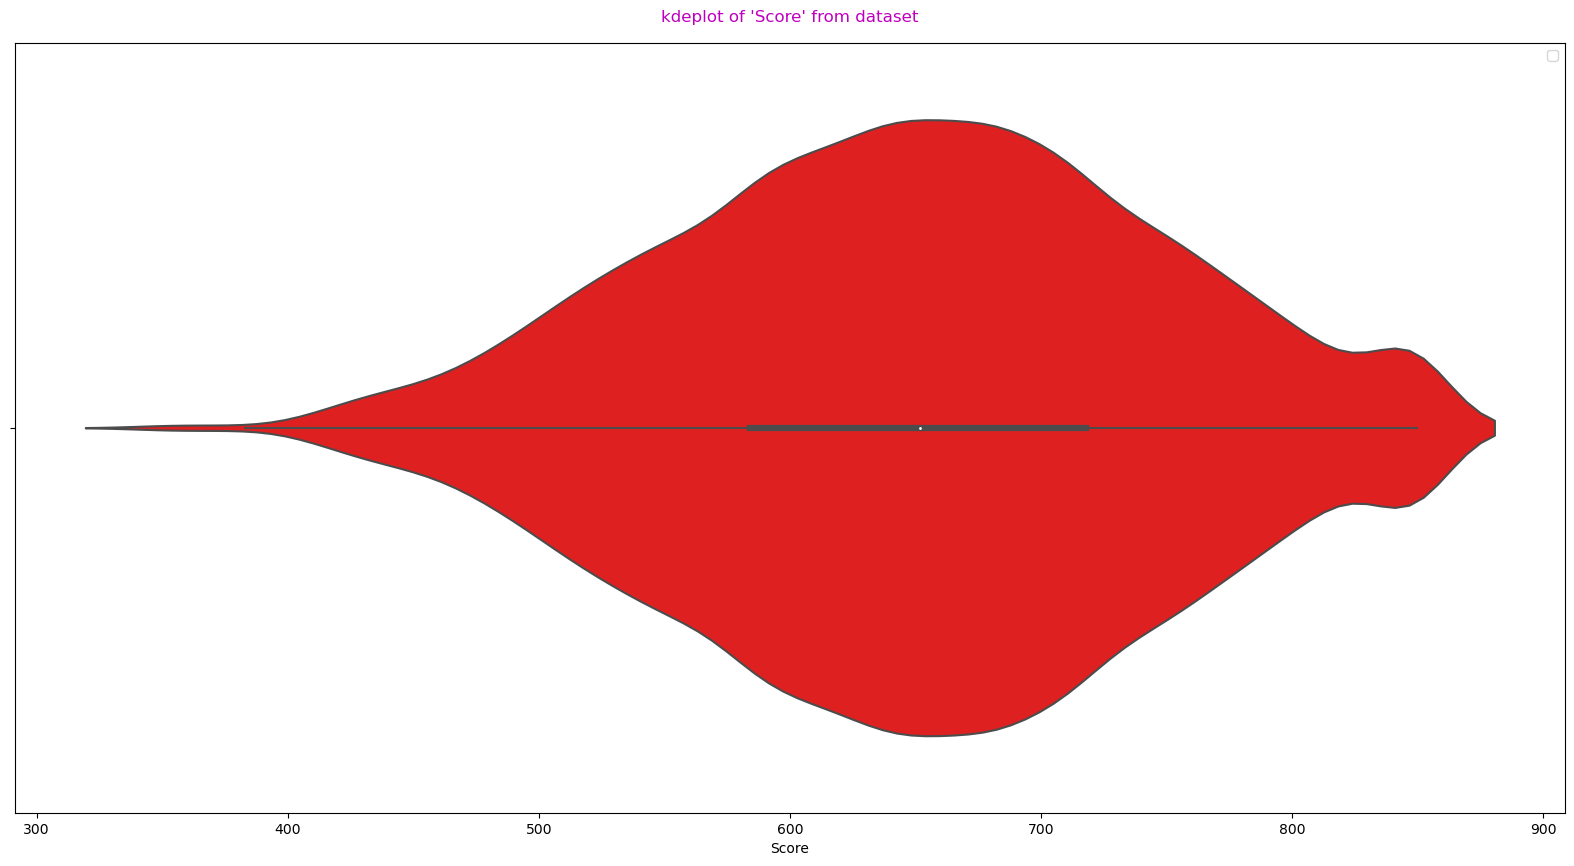

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


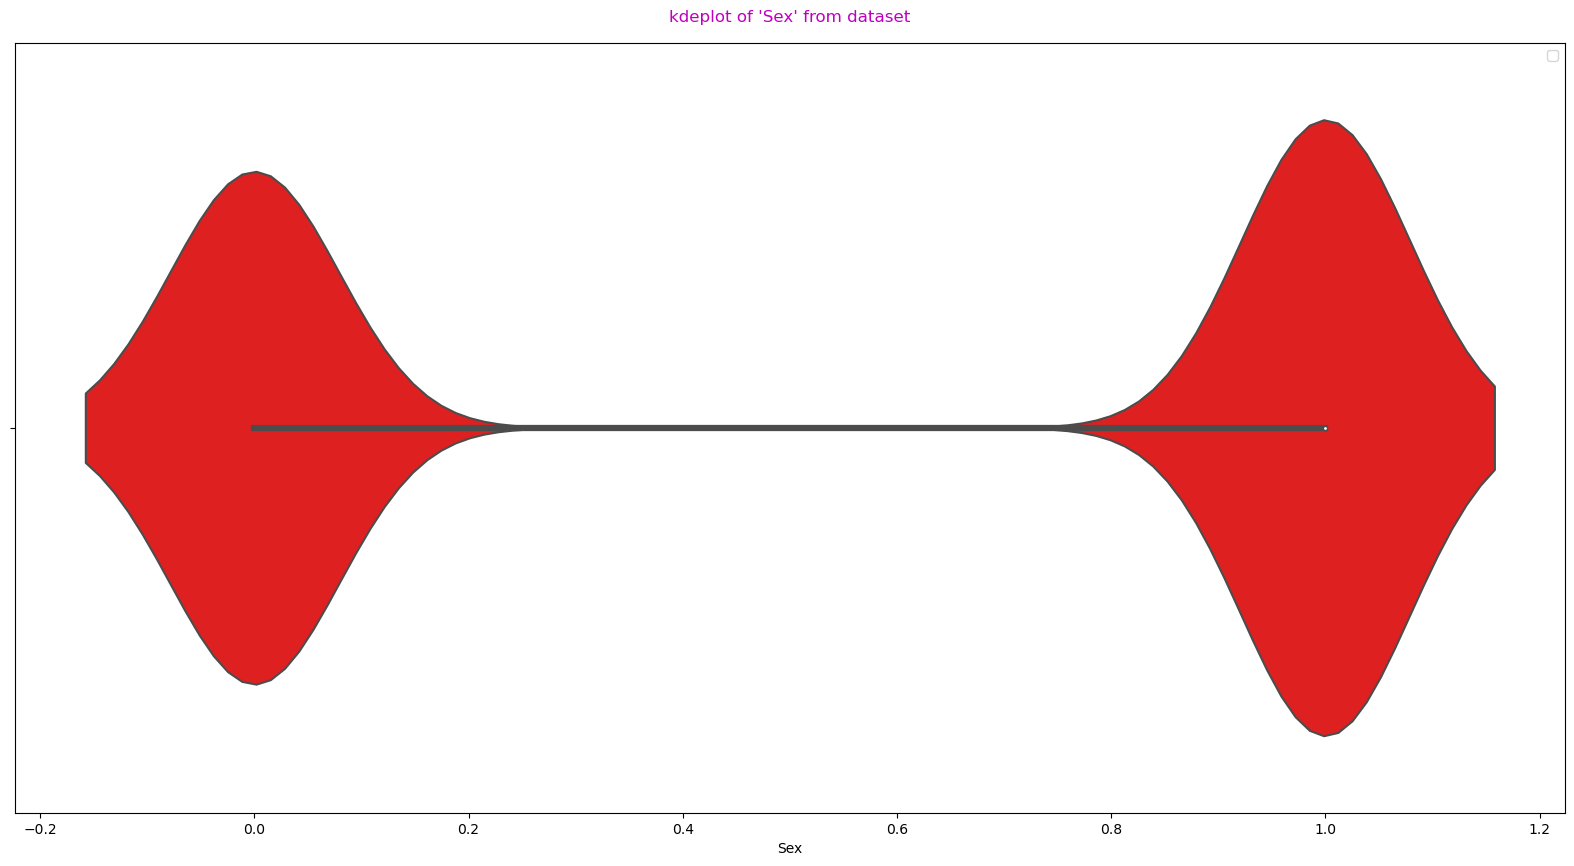

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


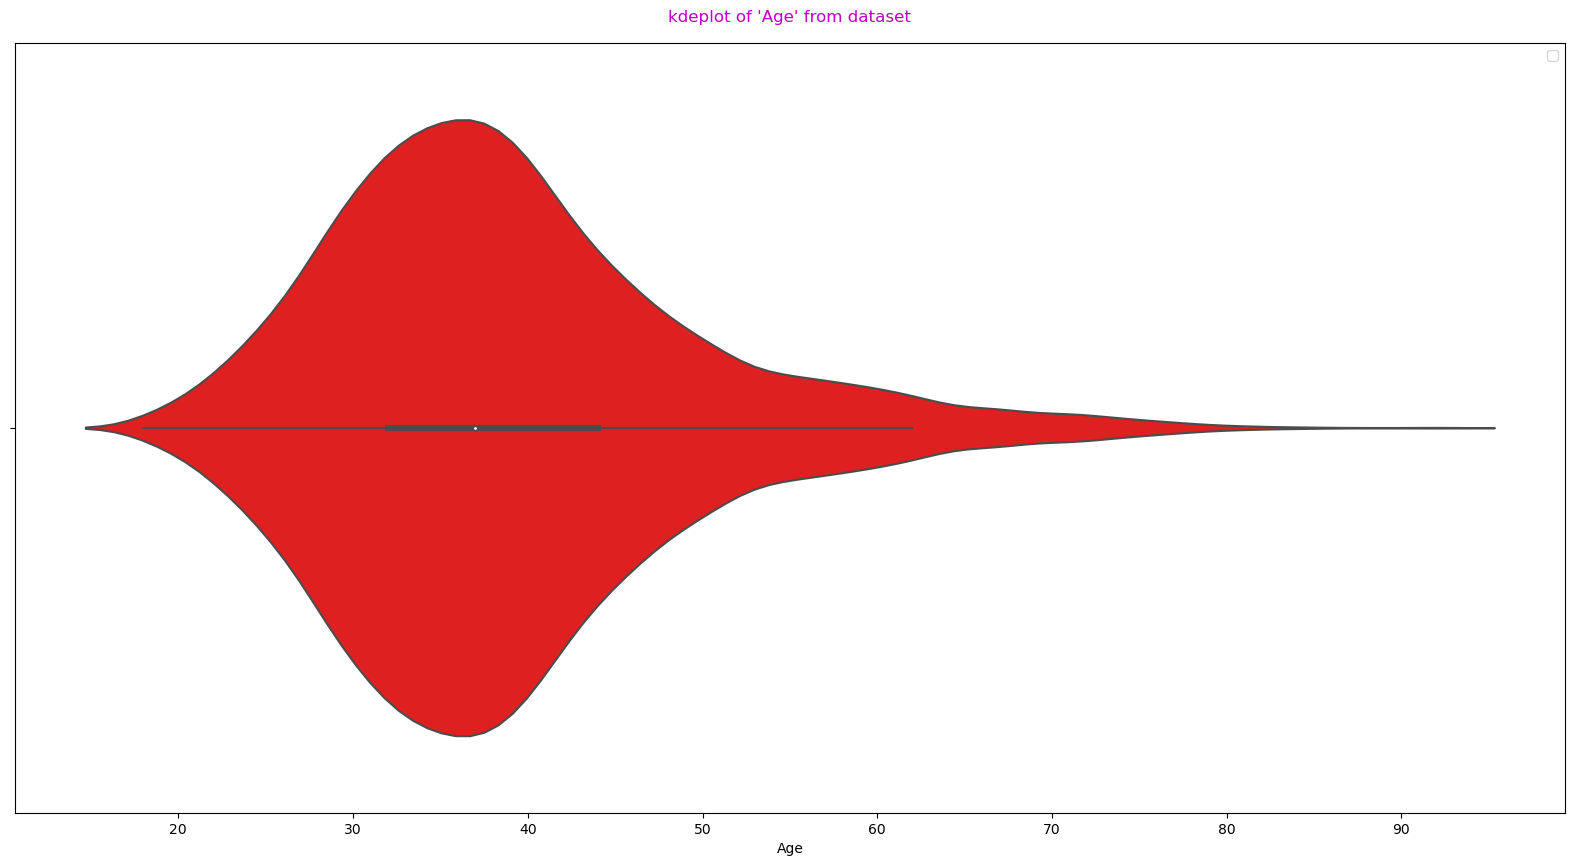

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


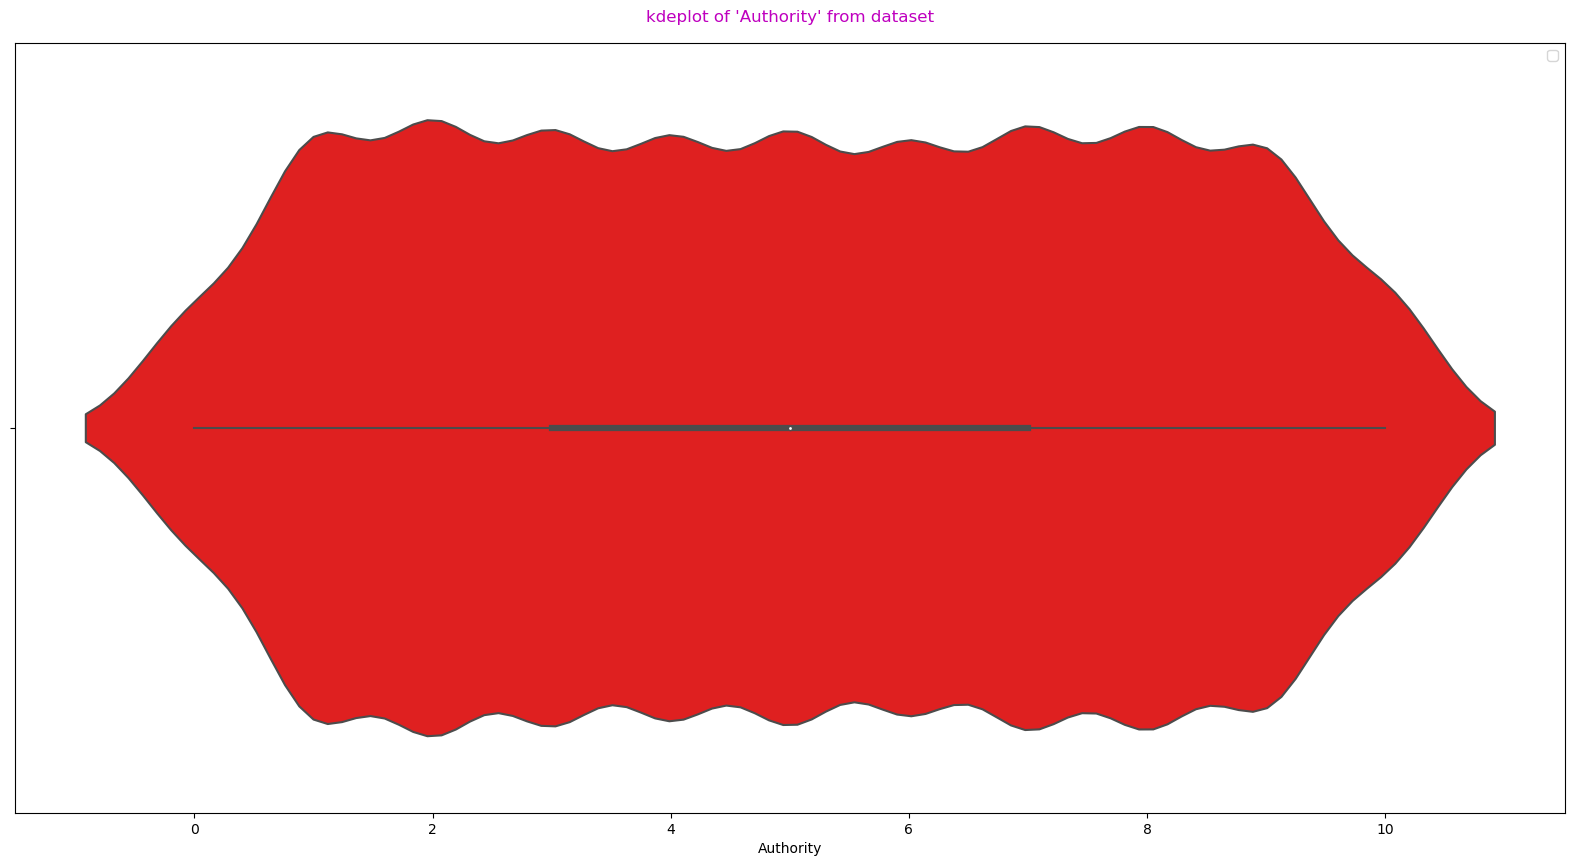

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


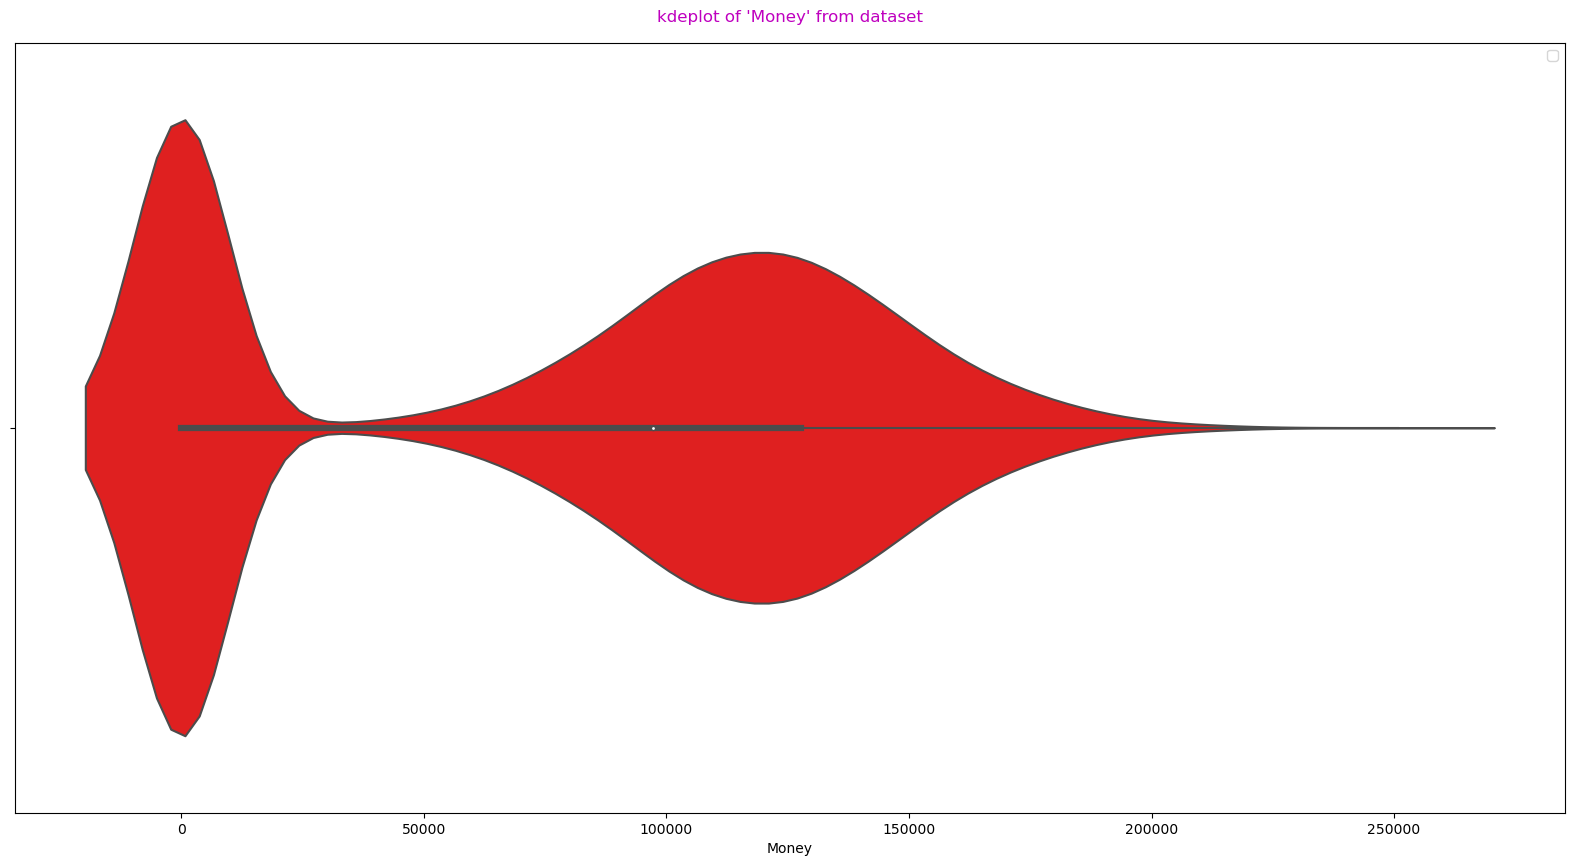

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


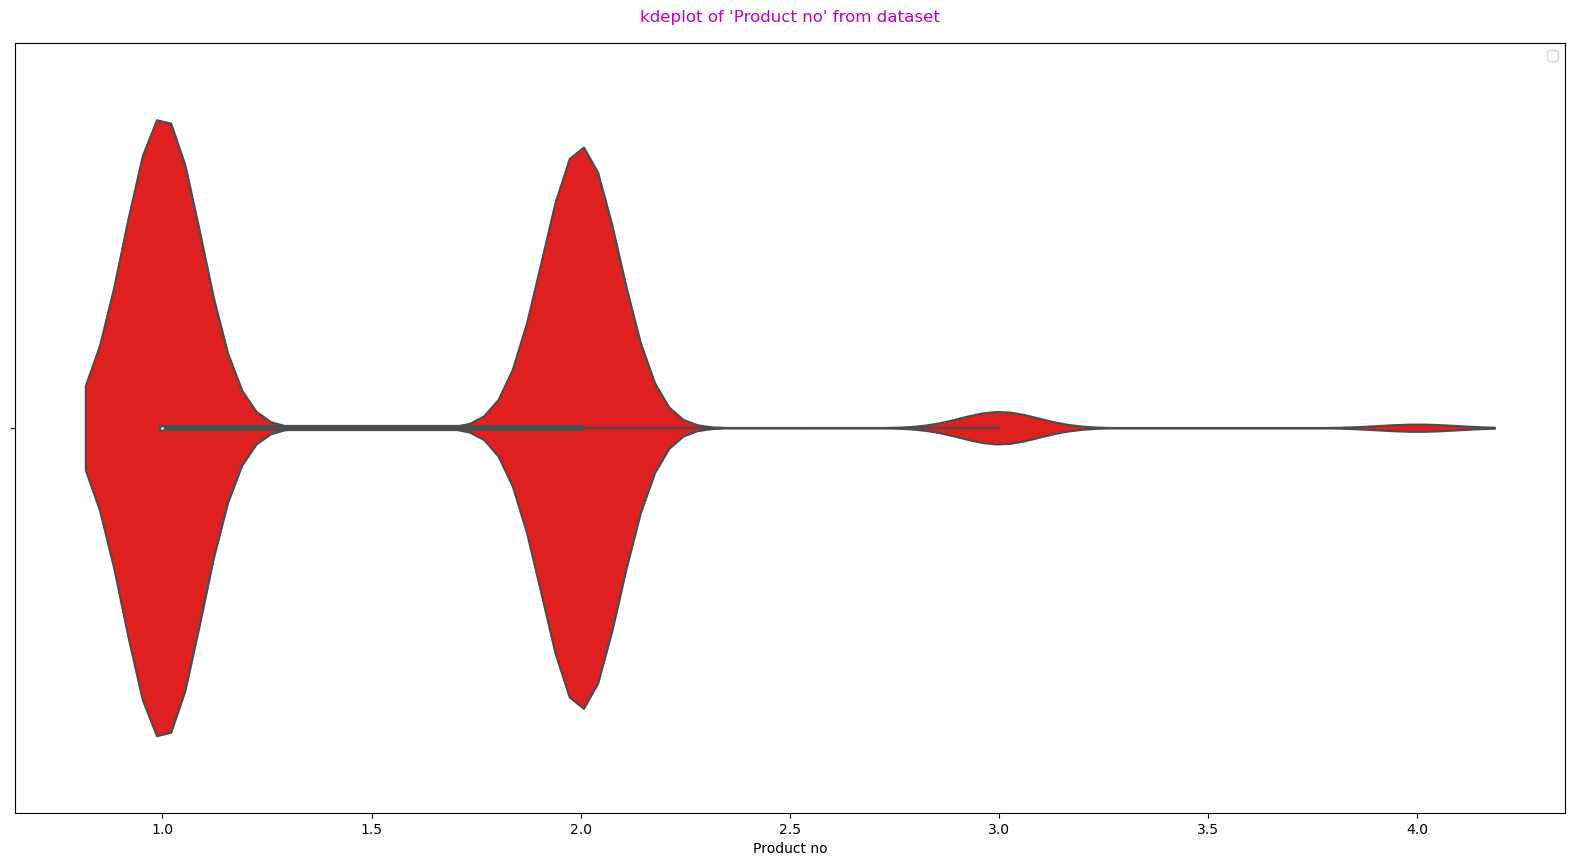

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


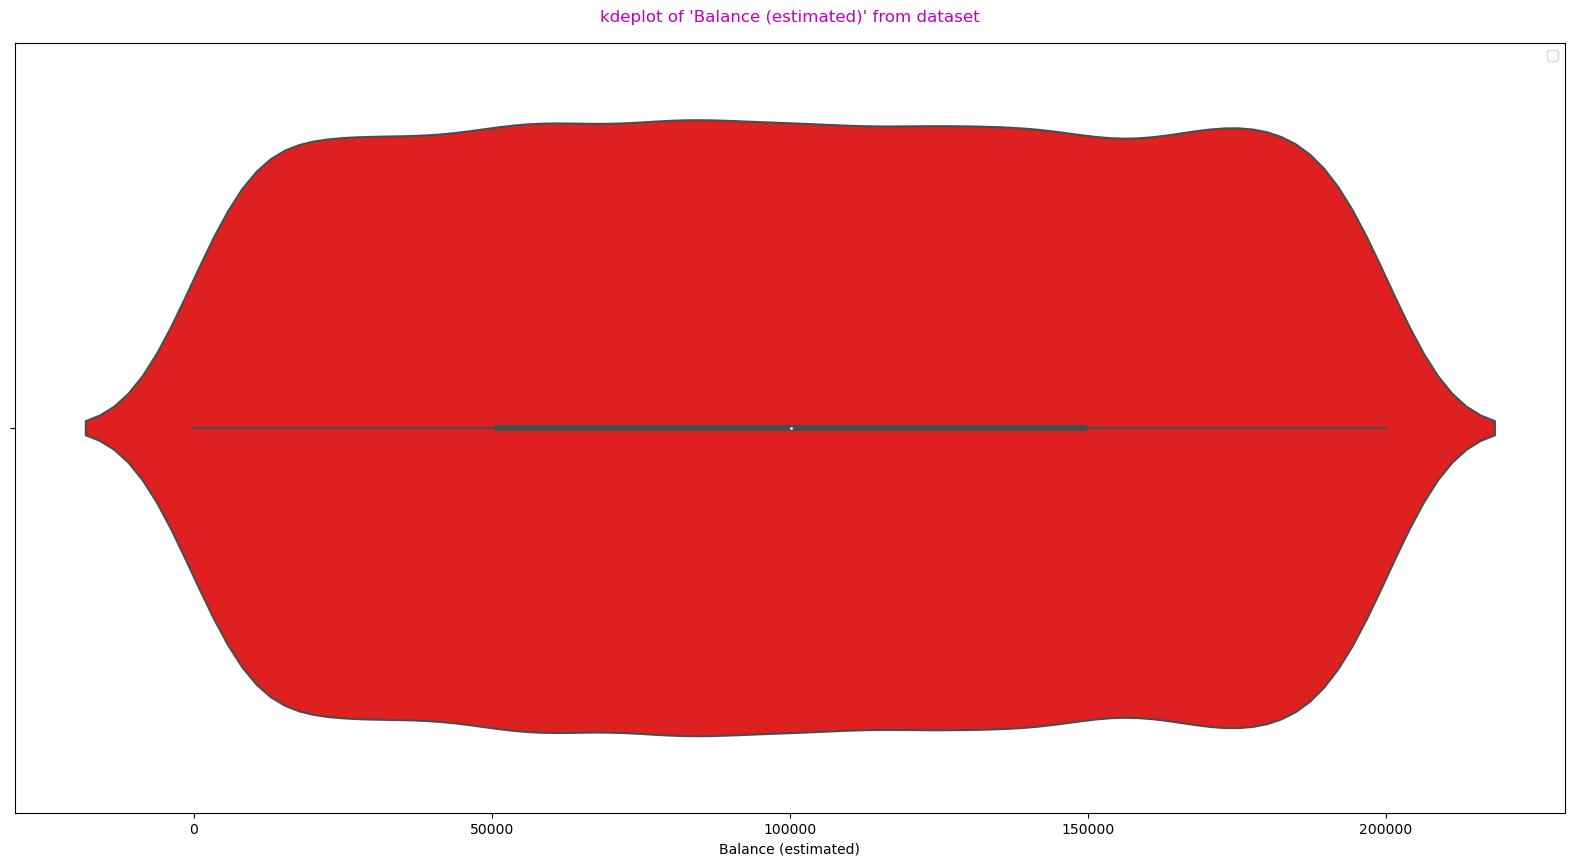

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


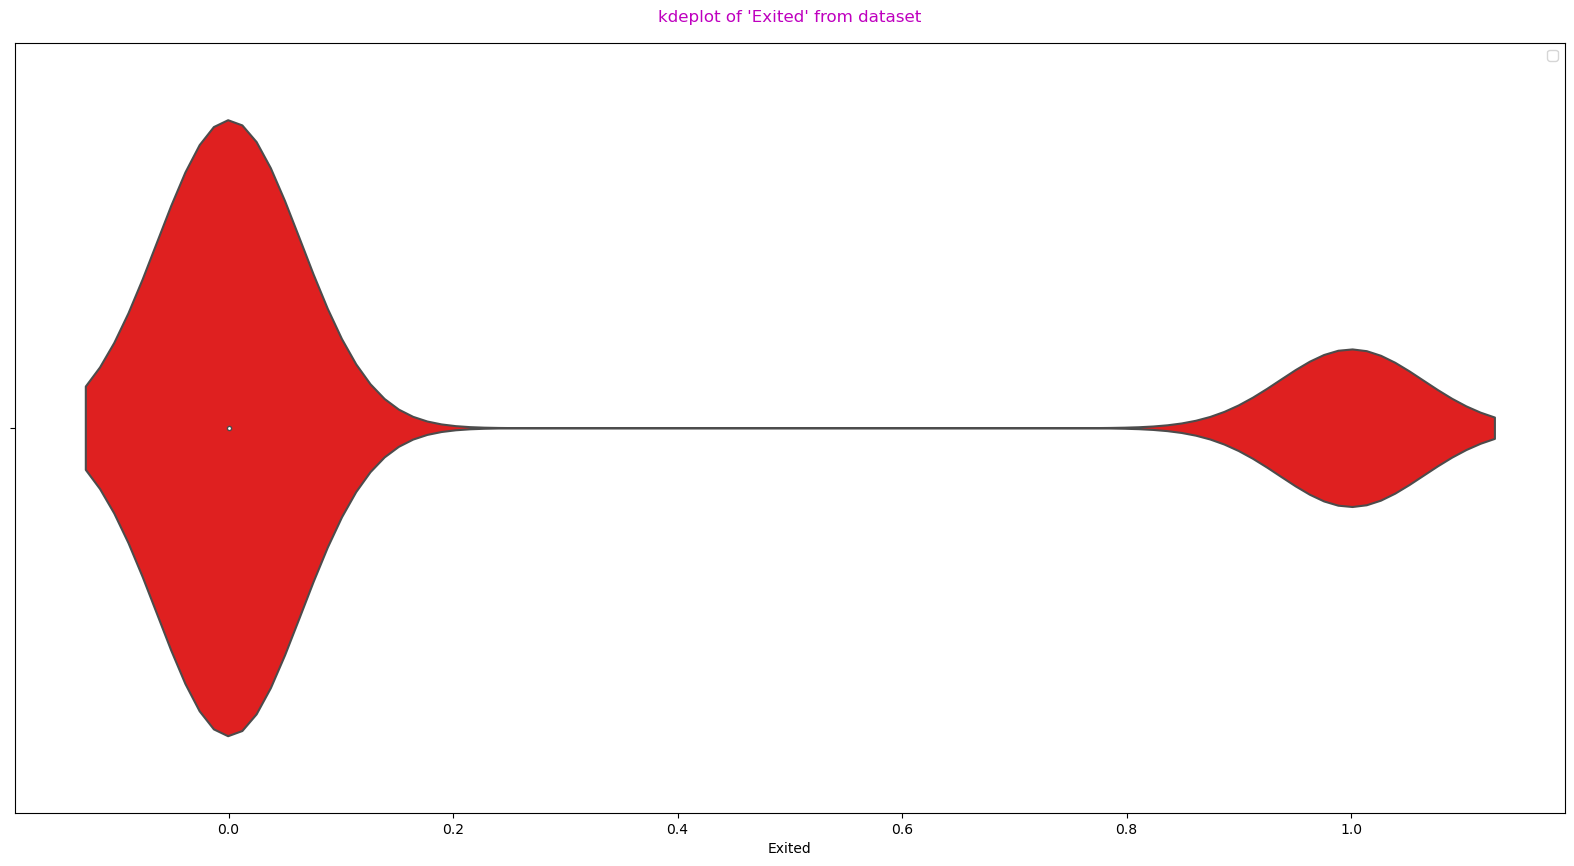

In [11]:

for feature in data1.columns:
    plt.figure(figsize = (20,10)) # plt.figure(figsize = (Width,Height))
    sns.violinplot(data = data1, x = feature, color = 'r')
    plt.title(f"kdeplot of '{feature}' from dataset", pad = 15, c = 'm')
    plt.xlabel(feature)
    plt.legend()
    plt.show()

In [14]:
X = data.drop('Exited', axis = 1)
Y = data.Exited

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(X)
data_x = pd.DataFrame(data = scaler.transform(X), columns = X.columns)
data_x

,ID,Score,Sex,Age,Authority,Money,Product no,Balance (estimated)
0,-0.783213,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,-0.606534,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,0.216534
2,-0.995885,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.240687
3,0.144767,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-0.108918
4,0.652659,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,-0.365276
...,...,...,...,...,...,...,...,...
9995,-1.177652,1.246488,0.912419,0.007457,-0.004426,-1.225848,0.807737,-0.066419
9996,-1.682806,-1.391939,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.027988
9997,-1.479282,0.604988,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.008643
9998,-0.119356,1.256835,0.912419,0.293517,-0.695982,-0.022608,0.807737,-0.125231


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.3, random_state= 12)
from sklearn.naive_bayes import BernoulliNB

In [18]:
model = BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

In [19]:
pred = model.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

In [21]:
confusion_matrix(y_test, pred)

array([[2207,  147],
       [ 534,  112]], dtype=int64)

In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2354
           1       0.43      0.17      0.25       646

    accuracy                           0.77      3000
   macro avg       0.62      0.56      0.56      3000
weighted avg       0.72      0.77      0.73      3000



In [23]:
print("Accuracy: ", np.round(accuracy_score(y_test, pred)*100), "%")

Accuracy:  77.0 %
